#  Szybka eksploracja danych i budowanie modeli predykcyjnych z użyciem Pythona

#### Autor: Mikołaj Sędek, Data Scientist, Grupa Pracuj Sp. z.o.o.

##### GIT: https://github.com/MikolajSedek/PythonCode/tree/master/DataScienceWBiznesie_7_12_2016

<img src="img/img005.png", width=400,height=400>
<img src="img/img001.png", width=400,height=400>
<img src="img/img002.png", width=400,height=400>
<img src="img/img003.png", width=400,height=400>
<img src="img/img004.jpg", width=400,height=400>


### Załadujmy moduły potrzebne nam do pracy

##### Uwaga: instalacja modułów xgboost i keras/theano w środowisku Windows jest czasochłonna i skomplikowana, w Linuxie jest o wiele łatwiej

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
#import modułów potrzebnych do modelowania

import xgboost
import sklearn
import pandas as pd
import keras
import seaborn as sns
import matplotlib
import imblearn
import numpy as np
import matplotlib.pyplot as plt
import numpy
import os
import h5py

from imblearn.under_sampling import RandomUnderSampler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import FunctionTransformer


from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.regularizers import l1l2


%matplotlib inline


C:\Users\mikolaj.sedek\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


## Takie wersje modułów są zainstalowane na mojej maszynie:
xgboost:0.4
sklearn:0.18
pandas:0.19.1
keras:1.1.0
seaborn:0.7.1
matplotlib:1.5.1
imblearn:0.1.8
h5py:2.6.0

In [3]:
#sprawdzenie wersji modułów

print("xgboost:"+str(xgboost.__version__))
print("sklearn:"+str(sklearn.__version__))
print("pandas:"+str(pd.__version__))
print("keras:"+str(keras.__version__))
print("seaborn:"+str(sns.__version__))
print("matplotlib:"+str(matplotlib.__version__))
print("imblearn:"+str(imblearn.__version__))
print("h5py:"+str(h5py.__version__))


xgboost:0.4
sklearn:0.18
pandas:0.19.1
keras:1.1.1
seaborn:0.7.1
matplotlib:1.5.1
imblearn:0.1.8
h5py:2.6.0


### Pobranie danych zajmie ok. 30 sekund - to ponad 300 tys. rekordów

In [4]:
#ładujemy dane z plików csv

dataset_learn = pd.read_csv("datasets\data_learning.csv", sep=";", decimal=".", compression="gzip",index_col=False)

dataset_apply = pd.read_csv("datasets\data_apply.csv", sep=";", decimal=".", compression="gzip",index_col=False)


In [5]:
#Zobaczmy z jakimi danymi mamy do czynienia

print("dane uczące - wiersze,kolumny: " + str(dataset_learn.shape))

print("dane wdrożeniowe - wiersze,kolumny: " + str(dataset_apply.shape))



dane uczące - wiersze,kolumny: (349359, 390)
dane wdrożeniowe - wiersze,kolumny: (104862, 390)


In [6]:
#zmienne w zbiorze uczącym i wdrożeniowym

dl_vars= list(dataset_learn.columns.values)
da_vars= list(dataset_apply.columns.values)


print(dl_vars)


['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131', 'v132', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v1

In [7]:
print(da_vars)


['userid', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v107', 'v108', 'v109', 'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131', 'v132', 'v133', 'v134', 'v135', 'v136', 'v137', '

### Zobaczmy jak wygląda ramka danych na których będziemy pracować

In [8]:
dataset_learn.iloc[0:10,0:10]

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,36,20,23,0,0,1,12,12,0,0
1,127,19,100,19,2,6,0,15,3,0
2,115,17,29,1,1,7,77,5,0,0
3,15,4,14,1,0,0,0,4,0,0
4,2,2,2,0,0,0,0,2,0,0
5,19,8,19,0,0,0,0,8,0,0
6,104,5,104,0,0,0,0,5,0,0
7,35,6,33,0,0,2,0,6,0,0
8,76,2,43,0,0,0,33,0,0,0
9,117,18,72,0,0,2,43,4,0,0


In [9]:
dataset_learn.iloc[0:10,380:390]

,v381,v382,v383,v384,v385,v386,v387,v388,v389,Target
0,400,400,14,2,2,400,400,400,14,Nie
1,41,41,9,4,6,400,41,400,9,Nie
2,30,400,20,14,27,30,400,400,20,Nie
3,400,400,26,26,237,237,400,26,104,Nie
4,244,244,244,244,400,244,400,244,244,Nie
5,11,400,11,11,400,400,400,400,400,Tak
6,400,400,400,400,400,400,400,400,400,Nie
7,300,400,300,28,28,300,300,300,28,Nie
8,400,400,400,400,400,400,400,400,400,Nie
9,196,196,196,196,400,196,400,400,196,Tak


### Sprawdźmy częstości w zmiennej celu - może się okazać że będzie trzeba będzie zbalansować dane uczące

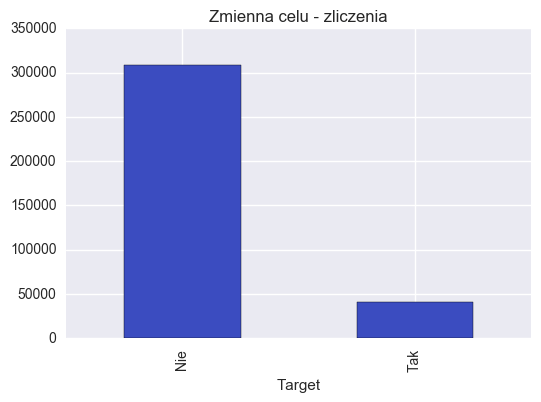

In [10]:
dataset_learn.groupby("Target").size().plot(kind="bar",
                                            title="Zmienna celu - zliczenia", colormap = "coolwarm")

In [11]:
print(dataset_learn.groupby("Target").size())

Target
Nie    308165
Tak     41194
dtype: int64


### Wiele modeli preferuje zmienną celu w formie binarnej - 0/1

In [12]:
#przekodowanie zmiennej celu na zmienną binarną

#skorzystamy z fukncji dostępnej w sklearn
le = LabelEncoder()
le.fit(dataset_learn["Target"])

print("oryginalne klasy w zmiennej celu: " +str(le.classes_))
Target_New = le.transform(dataset_learn["Target"])

dataset_learn["Target"]=Target_New
dataset_learn.groupby("Target").size()



oryginalne klasy w zmiennej celu: ['Nie' 'Tak']


Target
0    308165
1     41194
dtype: int64

### Zadbajmy o braki danych oraz usunięcie zmiennych z zerową wariancją

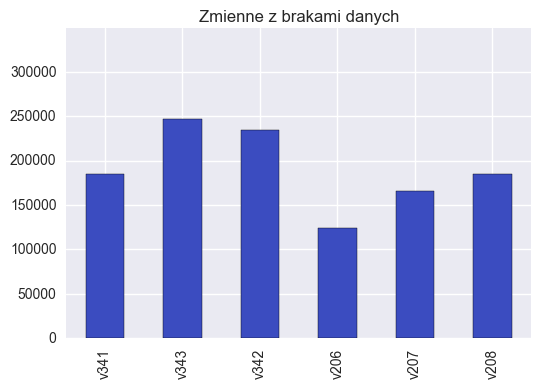

In [13]:
#usuwamy braki danych

#znajdźmy zmienne z brakami danych
dict_miss = {k:v for (k,v) in dict(dataset_learn.isnull().sum()).items() if v > 1}

pd.DataFrame.from_dict(dict_miss,orient="index").plot(kind="bar",legend=False,
                                                      title="Zmienne z brakami danych",
                                                      ylim=(0,dataset_learn.shape[0]),
                                                     colormap="coolwarm")


In [14]:
#wypełnienie braków danych medianą
miss_vars = dict_miss.keys()

dataset_learn[miss_vars] = dataset_learn[miss_vars].fillna(dataset_learn[miss_vars].median())

dict_miss_check = {k:v for (k,v) in dict(dataset_learn.isnull().sum()).items() if v > 1}

print("lista zmiennych w których nadal występują braki danych: "+ str(dict_miss_check))


lista zmiennych w których nadal występują braki danych: {}


In [15]:
#usuwamy zmienne mające zerową wariancję (stałych :) )
  

vars_unique = pd.DataFrame(dataset_learn.apply(pd.Series.nunique))

vars_constant = list(vars_unique[vars_unique[0]==1].index)

print("zmienne w których występuje zerowa wariancja:")
print(str(vars_constant))

print(dataset_learn[vars_constant].head)


dataset_learn.drop(vars_constant,axis=1,inplace=True)


zmienne w których występuje zerowa wariancja:
['v117', 'v118', 'v119', 'v252', 'v253', 'v254']
<bound method DataFrame.head of         v117  v118  v119  v252  v253  v254
0          0     0     0     0     0     0
1          0     0     0     0     0     0
2          0     0     0     0     0     0
3          0     0     0     0     0     0
4          0     0     0     0     0     0
5          0     0     0     0     0     0
6          0     0     0     0     0     0
7          0     0     0     0     0     0
8          0     0     0     0     0     0
9          0     0     0     0     0     0
10         0     0     0     0     0     0
11         0     0     0     0     0     0
12         0     0     0     0     0     0
13         0     0     0     0     0     0
14         0     0     0     0     0     0
15         0     0     0     0     0     0
16         0     0     0     0     0     0
17         0     0     0     0     0     0
18         0     0     0     0     0     0
19         0 

### Podzielmy nasze dane na zbiór uczący i testowy, zbalansujmy dane uczące

In [16]:
#podział na zbiór testowy i uczący

seed = 7

training, testing = train_test_split(dataset_learn, test_size = 0.2, random_state=seed)

print("wielkość zbioru uczącego :"+ str(training.shape))
print("wielkość zbioru testowego :"+ str(testing.shape))


wielkość zbioru uczącego :(279487, 384)
wielkość zbioru testowego :(69872, 384)


#### Balansowanie zbioru uczącego można wykonać za pomocą modułu imblern 

dla osób zainteresowanych tematyką niezbalansowanych zbiorów uczących:<br>
http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/ <br>
https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set <br>
https://github.com/scikit-learn-contrib/imbalanced-learn <br>


In [17]:
#zbalansowanie zbioru uczącego

iv_vars = list(training.columns.values)
iv_vars.remove("Target")

#definicja metody próbkowania
rus = RandomUnderSampler(replacement=False, random_state=seed)

training_rs_ivs, training_rs_dv = rus.fit_sample(training[iv_vars], training["Target"])



In [18]:
print("liczba zer: "+str(list(training_rs_dv).count(0)))
print("liczba jedynek: "+str(list(training_rs_dv).count(1)))


liczba zer: 33035
liczba jedynek: 33035


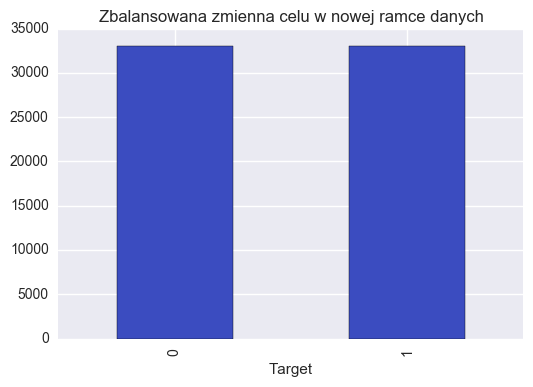

In [19]:
#tworzymy nową ramkę danych ze zbalansowanymi danymi treningowymi

training_bal = pd.DataFrame(training_rs_ivs)
training_bal.columns = iv_vars
training_bal["Target"]=training_rs_dv
training_bal=training_bal.sample(frac=1)

training_bal.iloc[0:10,0:10]

training_bal.groupby("Target").size().plot(kind="bar",
                                           title="Zbalansowana zmienna celu w nowej ramce danych",
                                          colormap="coolwarm")


### Bardzo ważnym etapem procesu jest dobór optymalnych predyktorów
#### Ponieważ korzystamy z anonimowych zmiennych zastosujemy statystykę ważności zmiennych z modelu Random Forest (analiza wrażliwości)
#### http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [20]:
#dobór zmiennych z użyciem Random Forest 


rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10, min_samples_split=20, min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=True, n_jobs=-1, random_state=seed, verbose=1, warm_start=False, class_weight=None)

rf.fit(training_bal[iv_vars],training_bal["Target"])



[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   25.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=7,
            verbose=1, warm_start=False)

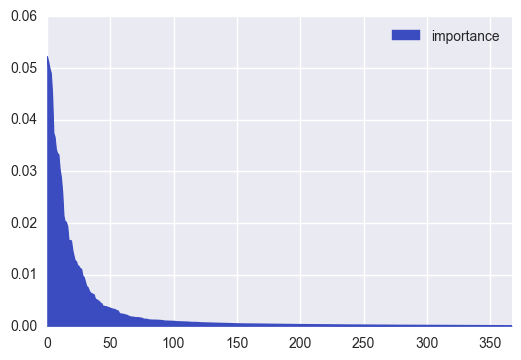

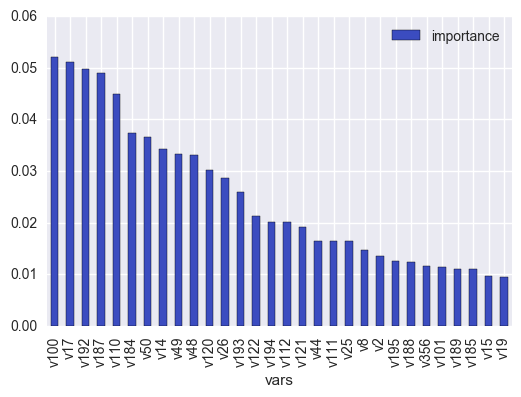

In [21]:
#selekcja najlepszych zmiennych dzięki statytyskom ważności z Random Forest

features_frame = pd.DataFrame()

features_frame["vars"]=iv_vars
features_frame["importance"]=rf.feature_importances_

features_frame.sort_values(by="importance",ascending=False,inplace=True)

features_frame[features_frame.importance>0].plot(kind="area",use_index=False, colormap="coolwarm")

features_frame.iloc[0:30].plot(kind="bar",x="vars",y="importance", colormap="coolwarm")




In [22]:
print("liczba zmiennych o ważności większej niż 0.01: "+ str(features_frame[features_frame.importance>0.01].shape[0]))

imp_vars = list(features_frame[features_frame.importance>0.01].vars)

print(imp_vars)

liczba zmiennych o ważności większej niż 0.01: 28
['v100', 'v17', 'v192', 'v187', 'v110', 'v184', 'v50', 'v14', 'v49', 'v48', 'v120', 'v26', 'v193', 'v122', 'v194', 'v112', 'v121', 'v44', 'v111', 'v25', 'v8', 'v2', 'v195', 'v188', 'v356', 'v101', 'v189', 'v185']


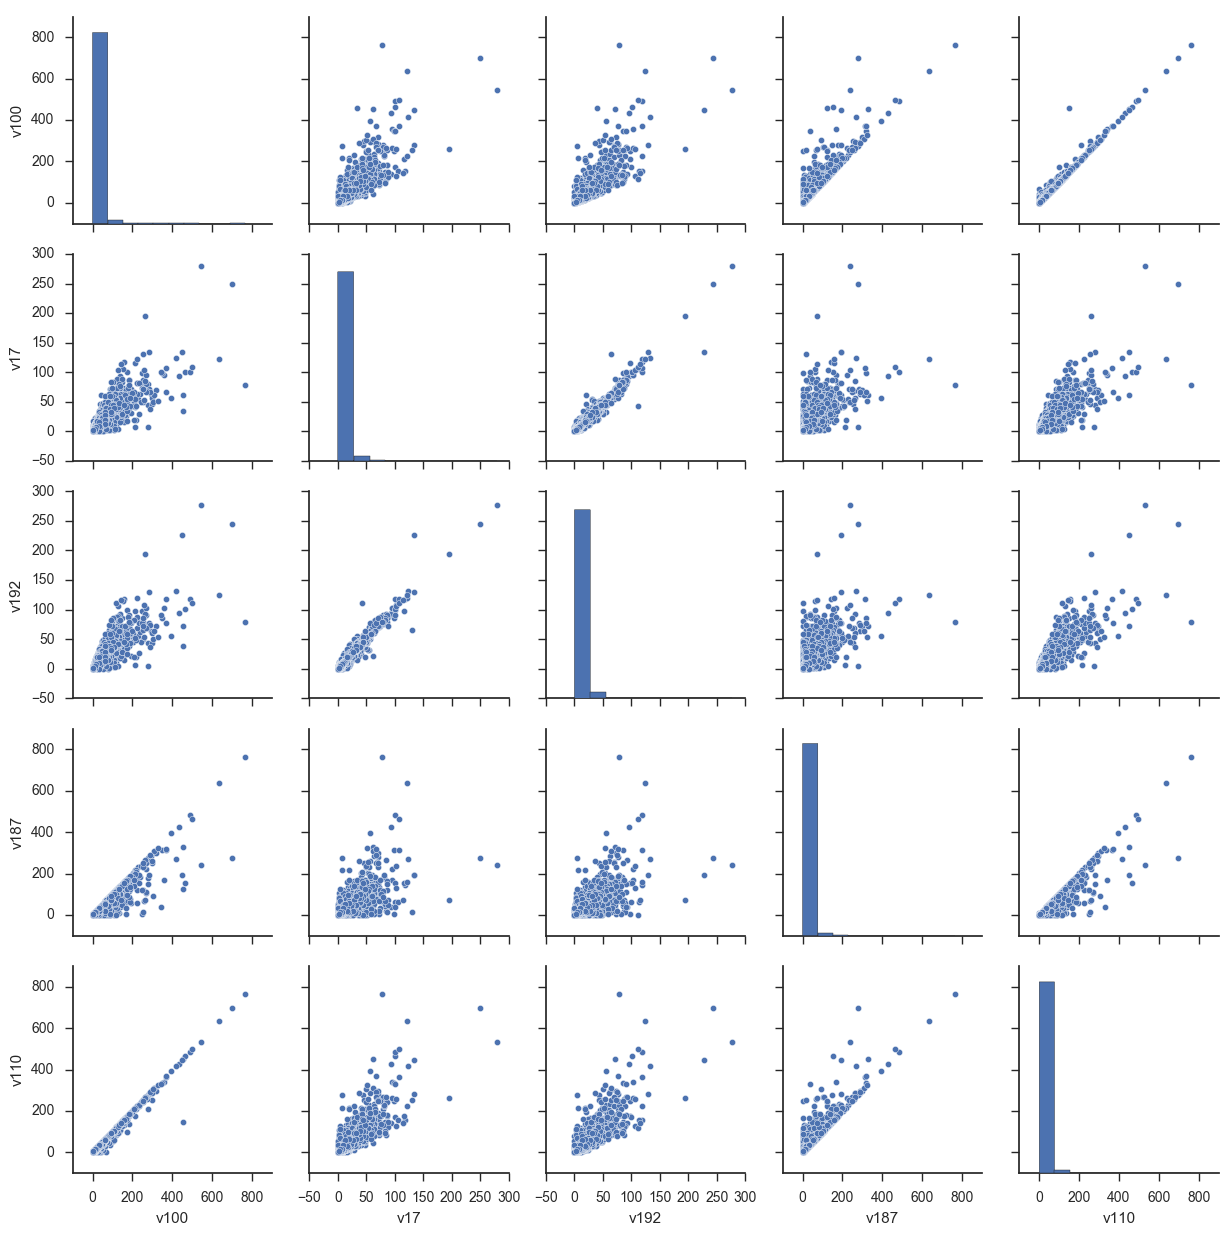

In [23]:
#zbadajmy przy okazji korelacje między predyktorami - np. 5 najważniejszymi wg rankingu Random Forest
#przy okazji może odryjemy coś ciekawego związanego z rozkładami zmiennych


top5vars = list(features_frame.vars[0:5])

sns.set(style="ticks", color_codes=True)

sns.pairplot(training_bal[top5vars].sample(frac=0.5))





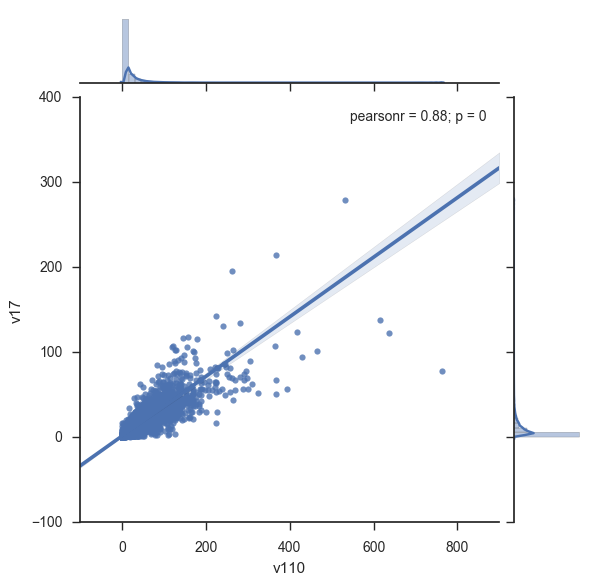

In [24]:
#może zbadamy relacje między dwiema zmiennymi bardziej dokładnie - na próbce danych

sns.jointplot("v110", "v17", data=training_bal.sample(frac=0.5), kind="reg")




# Rozpoczynamy budowanie modeli predykcyjnych

Na początek klasyczny model statystyczny - regresja logistyczna, zobaczymy jak poradzi sobie z naszymi danymi. Potem zastosujemy 
dużo potężniejsze uczenie maszynowe :).


In [25]:
#będziemy chcieli "poprawić" dystrybucje zmiennych dzięki przekształceniu logarytmicznemu log(1+wartość zmiennej),
#upewnijmy się że w naszych zmiennych nie ma wartości ujemnych

training_bal_neg = training_bal.columns[(training_bal < 0).any()].tolist()
testing_neg = testing.columns[(testing < 0).any()].tolist()

if len(training_bal_neg)>0:
    for i in training_bal_neg:
        training_bal[i]=np.where(training_bal[i]<0,0,training_bal[i])

if len(testing_neg)>0:
    for i in testing_neg:
        testing[i]=np.where(testing[i]<0,0,testing[i])

print("zmienne z wartościami ujemnymi w zbiorze uczącym: "+ str(training_bal_neg))        
print("zmienne z wartościami ujemnymi w zbiorze testowym: "+ str(testing_neg))        
        


zmienne z wartościami ujemnymi w zbiorze uczącym: []
zmienne z wartościami ujemnymi w zbiorze testowym: []


### Stworzymy sobie własną funkcję transformującą - skorzystamy z funkcji numpy log1p i przetestujemy ją na danych
https://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html <br>
http://scikit-learn.org/stable/modules/preprocessing.html#function-transformer <br>

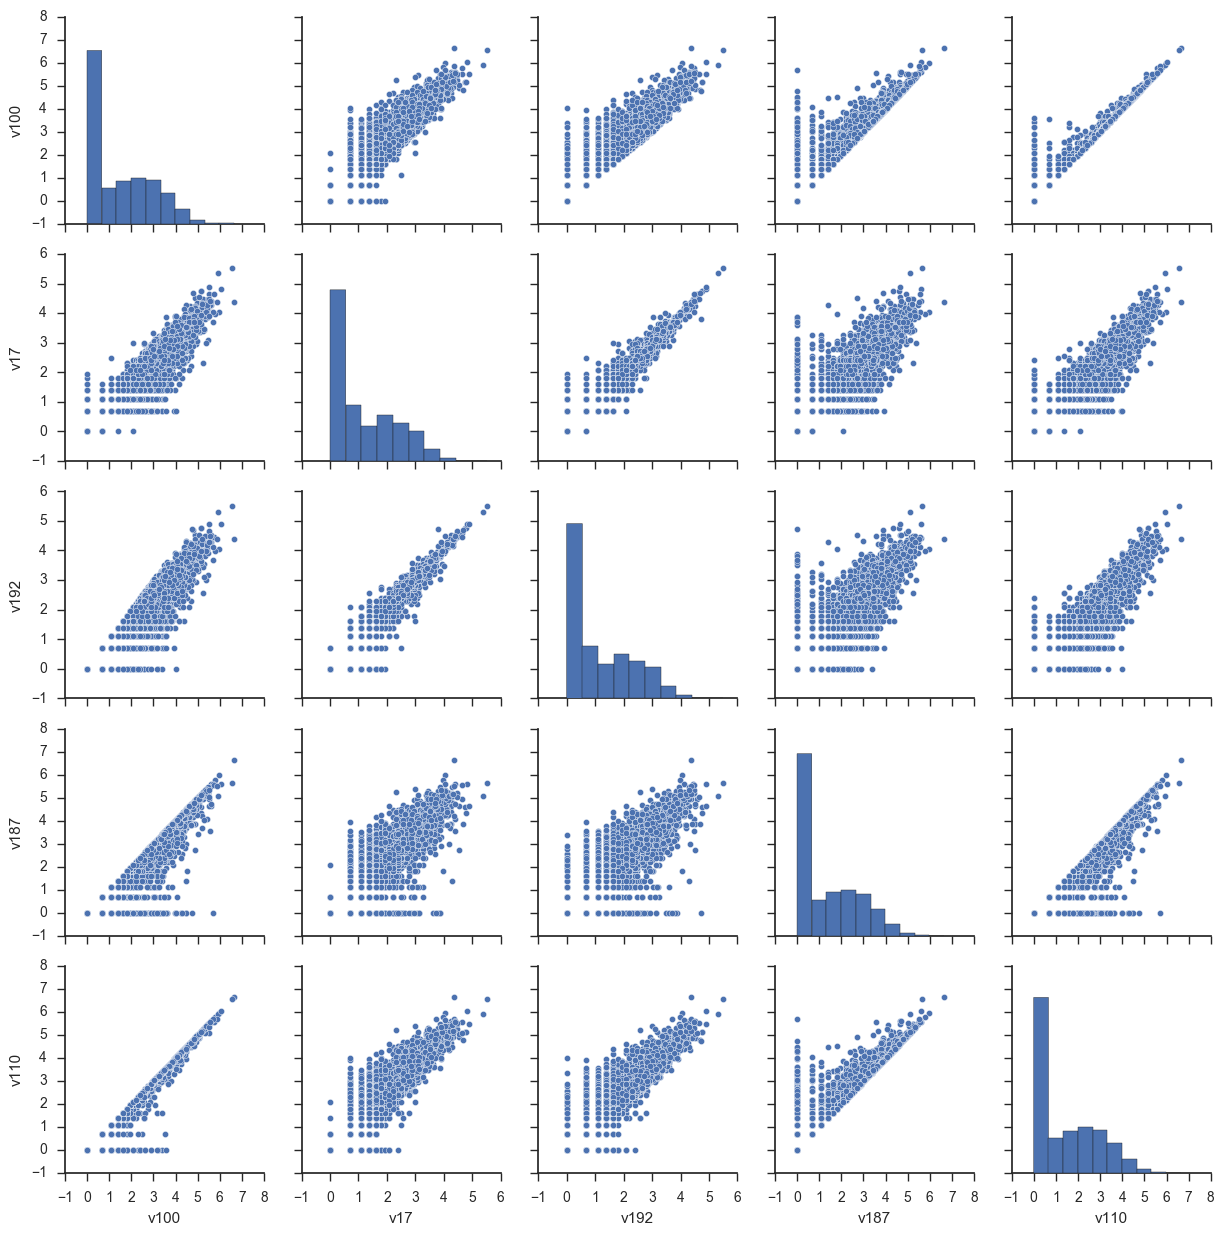

In [26]:

transformer_log1p = FunctionTransformer(np.log1p)

sns.pairplot(training_bal[top5vars].apply(np.log1p, axis=0).sample(frac=0.2))



In [27]:
#zastosujmy ustawienia domyślne poza zmianą verbose na 1 i n_jobs na -1 aby sklearn skorzystał ze wszystkich procesorów
lr = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=5, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=-1, verbose=1, refit=True, intercept_scaling=1.0, multi_class='ovr', random_state=seed)


estimators = []
estimators.append(('log1p', transformer_log1p))
estimators.append(('lr_model', lr))
pipeline_lr = Pipeline(estimators)


pipeline_lr.fit(training_bal[imp_vars],training_bal["Target"])



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.9s finished


Pipeline(steps=[('log1p', FunctionTransformer(accept_sparse=False, func=<ufunc 'log1p'>,
          inv_kw_args=None, inverse_func=None, kw_args=None, pass_y=False,
          validate=True)), ('lr_model', LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=7,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=1))])

In [28]:

#sprawdźmy jakość naszego modelu na danych testowych

pred_lr= pipeline_lr.predict(testing[imp_vars])
pred_lr_proba = pipeline_lr.predict_proba(testing[imp_vars])

pred_lr_proba_1 = list(pd.DataFrame(pred_lr_proba)[1])


czułość: 0.81
specyficzność: 0.79
powierzchnia pod krzywą:0.88


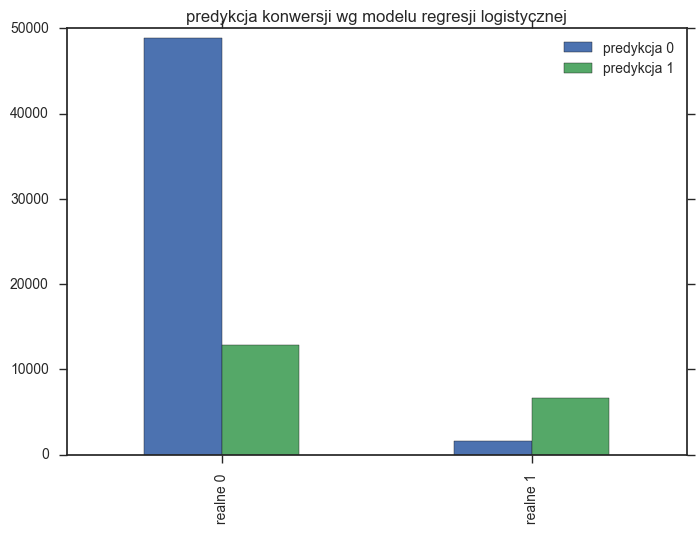

In [29]:
#liczymy macierz błędu dla regresji logistycznej

cf_lr=confusion_matrix(testing["Target"],pred_lr)

cf_lr_pd = pd.DataFrame(cf_lr)
cf_lr_pd.columns=["predykcja 0","predykcja 1"]
cf_lr_pd.index = ["realne 0","realne 1"]


cf_lr_pd.plot(kind="bar",title="predykcja konwersji wg modelu regresji logistycznej")

sens = round(cf_lr[1][1]*1.00 / np.sum(cf_lr[1]),2)
spec = round(cf_lr[0][0]*1.00 / np.sum(cf_lr[0]),2)
aucc = round(roc_auc_score(y_true=testing["Target"],y_score=pred_lr_proba_1),2)

print("czułość: "+str(sens))
print("specyficzność: "+str(spec))
print("powierzchnia pod krzywą:"+str(aucc))



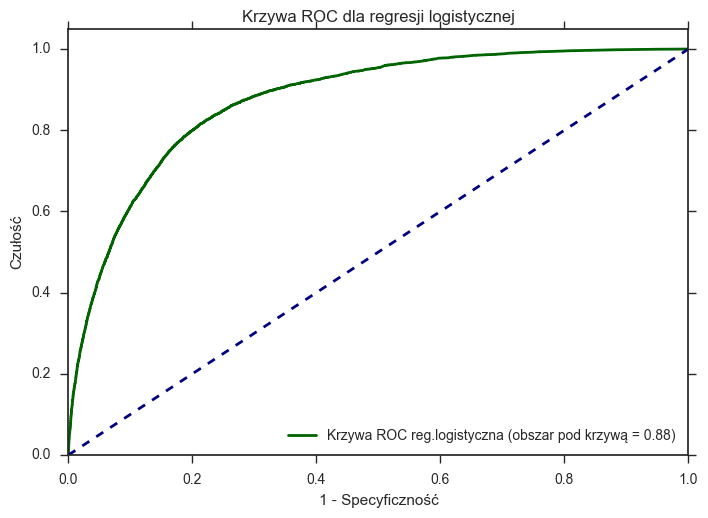

In [30]:
#spróbujmy to narysować :)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(testing["Target"], pred_lr_proba_1, pos_label=1, drop_intermediate = False)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
lw = 2
plt.plot(fpr_lr, tpr_lr, color='darkgreen',
         lw=lw, label=u'Krzywa ROC reg.logistyczna (obszar pod krzywą = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(u'1 - Specyficzność')
plt.ylabel(u'Czułość')
plt.title('Krzywa ROC dla regresji logistycznej')
plt.legend(loc="lower right")
plt.show()



## Czas na ciężką artylerię - Xtreeme Gradient Boosting Trees 

### https://xgboost.readthedocs.io/en/latest/

In [31]:
model_xgbm = XGBClassifier(base_score=0.5, colsample_bylevel=0.5, colsample_bytree=0.5,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=2000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1e-4,
       scale_pos_weight=1, seed=seed, silent=False, subsample=0.5)

#przygotowujemy dane do uczenia i testowania w formie macierzy - będzie szybciej :)
training_X = training_bal[imp_vars].apply(np.log1p, axis=0).as_matrix()
training_y = training_bal["Target"].as_matrix()

testing_X= testing[imp_vars].apply(np.log1p, axis=0).as_matrix()
testing_y = testing["Target"].as_matrix()


model_xgbm.fit(training_X,training_y, early_stopping_rounds=20, eval_metric="auc", eval_set=[(testing_X, testing_y)])





[0]	validation_0-auc:0.866631
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.869189
[2]	validation_0-auc:0.870336
[3]	validation_0-auc:0.872295
[4]	validation_0-auc:0.873722
[5]	validation_0-auc:0.874269
[6]	validation_0-auc:0.874242
[7]	validation_0-auc:0.874443
[8]	validation_0-auc:0.874397
[9]	validation_0-auc:0.87471
[10]	validation_0-auc:0.874918
[11]	validation_0-auc:0.875081
[12]	validation_0-auc:0.875162
[13]	validation_0-auc:0.875191
[14]	validation_0-auc:0.875322
[15]	validation_0-auc:0.875486
[16]	validation_0-auc:0.875494
[17]	validation_0-auc:0.875566
[18]	validation_0-auc:0.87566
[19]	validation_0-auc:0.875673
[20]	validation_0-auc:0.875659
[21]	validation_0-auc:0.875657
[22]	validation_0-auc:0.875702
[23]	validation_0-auc:0.875859
[24]	validation_0-auc:0.875908
[25]	validation_0-auc:0.875941
[26]	validation_0-auc:0.875937
[27]	validation_0-auc:0.87598
[28]	validation_0-auc:0.876004
[29]	validation_0-auc:0.876003
[30]	validation_0-a

XGBClassifier(base_score=0.5, colsample_bylevel=0.5, colsample_bytree=0.5,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=2000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=0.0001,
       scale_pos_weight=1, seed=7, silent=False, subsample=0.5)

In [32]:
#sprawdźmy jakość naszego modelu na danych testowych

pred_xgb= model_xgbm.predict(testing_X)
pred_xgb_proba = model_xgbm.predict_proba(testing_X)

pred_xgb_proba_1 = list(pd.DataFrame(pred_xgb_proba)[1])


czułość: 0.83
specyficzność: 0.78
powierzchnia pod krzywą:0.88


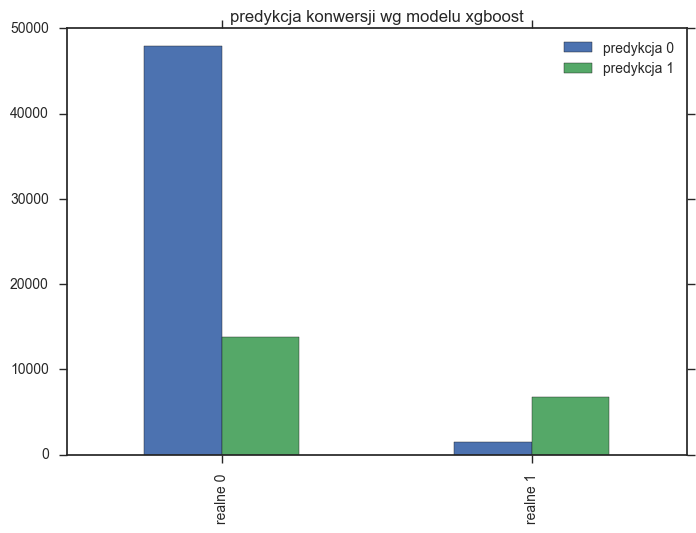

In [33]:
#liczymy macierz błędu dla xgboost

cf_xgb=confusion_matrix(testing["Target"],pred_xgb)

cf_xgb_pd = pd.DataFrame(cf_xgb)
cf_xgb_pd.columns=["predykcja 0","predykcja 1"]
cf_xgb_pd.index = ["realne 0","realne 1"]


cf_xgb_pd.plot(kind="bar",title="predykcja konwersji wg modelu xgboost")


sens = round(cf_xgb[1][1]*1.00 / np.sum(cf_xgb[1]),2)
spec = round(cf_xgb[0][0]*1.00 / np.sum(cf_xgb[0]),2)
aucc = round(roc_auc_score(y_true=testing["Target"],y_score=pred_xgb_proba_1),2)

print("czułość: "+str(sens))
print("specyficzność: "+str(spec))
print("powierzchnia pod krzywą:"+str(aucc))



In [34]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(testing["Target"], pred_xgb_proba_1, pos_label=1, drop_intermediate = False)

roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


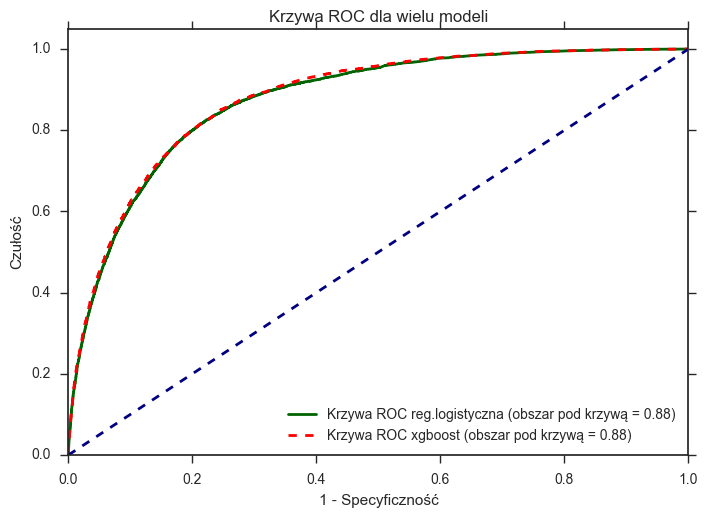

In [35]:

plt.figure()
lw = 2
plt.plot(fpr_lr, tpr_lr, color='darkgreen',
         lw=lw, label=u'Krzywa ROC reg.logistyczna (obszar pod krzywą = %0.2f)' % roc_auc_lr)
plt.plot(fpr_xgb, tpr_xgb, color='red',
         lw=lw, label=u'Krzywa ROC xgboost (obszar pod krzywą = %0.2f)' % roc_auc_xgb, linestyle='--')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(u'1 - Specyficzność')
plt.ylabel(u'Czułość')
plt.title('Krzywa ROC dla wielu modeli')
plt.legend(loc="lower right")
plt.show()


## Spróbujmy jeszcze z Support Vector Machines

### http://scikit-learn.org/stable/modules/svm.html


In [36]:
training_svm = training_bal.sample(n=10000,replace=False)

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

#konfigurujemy model z użyciem baggingu
n_estimators = 10
model_svm = BaggingClassifier(SVC(kernel="linear", C=2, gamma='auto', max_iter=-1, probability=True, random_state=seed, shrinking=True, verbose=True, tol=1e-5), max_samples=1.0 / n_estimators, n_estimators=n_estimators, oob_score=True, random_state=seed)

#dodajmy standaryzację - model svm tak jak sieć neuronowa może być na to wrażliwy
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('svm', model_svm))
pipeline_svm = Pipeline(estimators)



#calculate model
pipeline_svm.fit(training_svm[imp_vars],training_svm["Target"])


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

Pipeline(steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', BaggingClassifier(base_estimator=SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=7, ..., n_estimators=10, n_jobs=1, oob_score=True,
         random_state=7, verbose=0, warm_start=False))])

czułość: 0.84
specyficzność: 0.74
powierzchnia pod krzywą:0.87


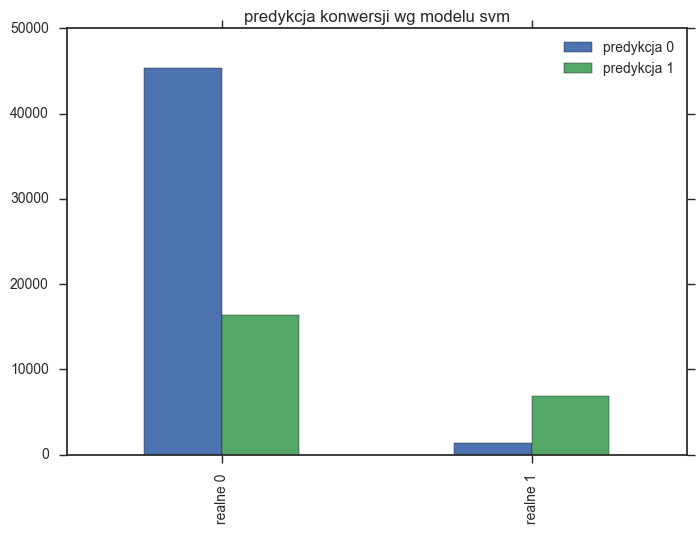

In [37]:
#sprawdźmy jakość naszego modelu na danych testowych

pred_svm= pipeline_svm.predict(testing[imp_vars])
pred_svm_proba = pipeline_svm.predict_proba(testing[imp_vars])

pred_svm_proba_1 = list(pd.DataFrame(pred_svm_proba)[1])

#liczymy macierz błędu dla svm

cf_svm=confusion_matrix(testing["Target"],pred_svm)

cf_svm_pd = pd.DataFrame(cf_svm)
cf_svm_pd.columns=["predykcja 0","predykcja 1"]
cf_svm_pd.index = ["realne 0","realne 1"]
cf_svm_pd.plot(kind="bar",title="predykcja konwersji wg modelu svm")

sens = round(cf_svm[1][1]*1.00 / np.sum(cf_svm[1]),2)
spec = round(cf_svm[0][0]*1.00 / np.sum(cf_svm[0]),2)
aucc = round(roc_auc_score(y_true=testing["Target"],y_score=pred_svm_proba_1),2)

print("czułość: "+str(sens))
print("specyficzność: "+str(spec))
print("powierzchnia pod krzywą:"+str(aucc))


In [38]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(testing["Target"], pred_svm_proba_1, pos_label=1, drop_intermediate = False)

roc_auc_svm = auc(fpr_svm, tpr_svm)

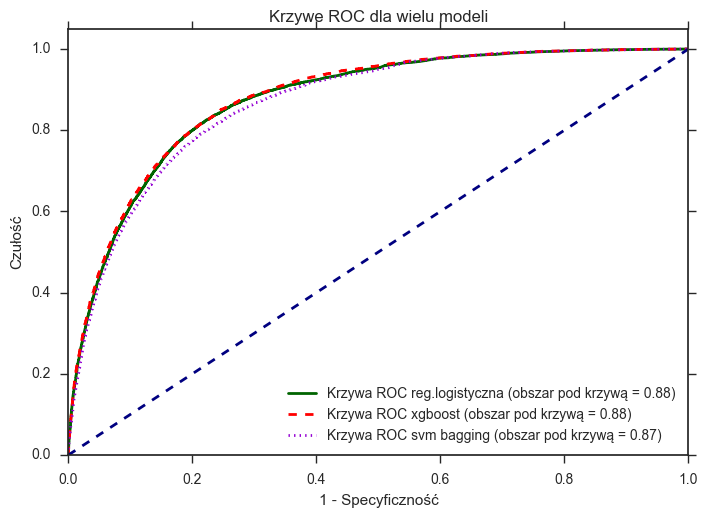

In [39]:
plt.figure()
lw = 2
plt.plot(fpr_lr, tpr_lr, color='darkgreen',
         lw=lw, label=u'Krzywa ROC reg.logistyczna (obszar pod krzywą = %0.2f)' % roc_auc_lr)
plt.plot(fpr_xgb, tpr_xgb, color='red',
         lw=lw, label=u'Krzywa ROC xgboost (obszar pod krzywą = %0.2f)' % roc_auc_xgb, linestyle='--')
plt.plot(fpr_svm, tpr_svm, color='darkviolet',
         lw=lw, label=u'Krzywa ROC svm bagging (obszar pod krzywą = %0.2f)' % roc_auc_svm, linestyle=':')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(u'1 - Specyficzność')
plt.ylabel(u'Czułość')
plt.title('Krzywe ROC dla wielu modeli')
plt.legend(loc="lower right")
plt.show()


## A teraz spróbujmy podejścia z sieciami neuronowymi

### https://keras.io/


In [40]:
#dajmy kerasowi pełną moc na CPU 

#multithreading
import multiprocessing
num_cores = str(multiprocessing.cpu_count())

import os
os.environ['OMP_NUM_THREADS'] = num_cores
os.environ['GOTO_NUM_THREADS'] = num_cores
os.environ['OPENBLAS_NUM_THREADS'] = num_cores

import mkl
mkl.set_num_threads(int(num_cores))


In [41]:
#skorzystamy z wrappera KerasClassifier który pozwoli nam skorzystać z modelu Keras/Theano w ScikitLearn

def create_model():
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(len(imp_vars),)))
    model.add(Dense(100, init='normal', activation='relu', W_constraint=maxnorm(2), W_regularizer=l1l2(l1=0,l2=1e-4)))
    model.add(Dropout(0.2))
    model.add(Dense(60, init='normal', activation='relu', W_constraint=maxnorm(2), W_regularizer=l1l2(l1=0,l2=1e-4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.005, momentum=0.9, decay=0.0, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['fbeta_score'])
    return model


In [42]:
#dodajemy możliwość zatrzymania nauki modelu gdy przez 5 kolejnych epok wyniki się nie poprawią - na podstawie statystyk z danych walidacyjnych
earlyStopping=keras.callbacks.EarlyStopping(monitor='val_fbeta_score', patience=5, verbose=1, mode='auto')

#zapamiętujemy najlepszy model w pliku - uwaga! konieczna instalacja biblioteki h5py
filepath="temp\model_best.hdf5"
modelCheck = keras.callbacks.ModelCheckpoint(filepath, monitor='val_fbeta_score', verbose=1, save_best_only=True, mode='auto')


#przygotowujemy dane do uczenia i testowania w formie macierzy - będzie szybciej :)
training_X = training_bal[imp_vars].as_matrix()
training_y = training_bal["Target"]

testing_X= testing[imp_vars].as_matrix()
testing_y = testing["Target"].as_matrix()

seed = 7
numpy.random.seed(seed)
estimators = []
estimators.append(('log1p', transformer_log1p))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, nb_epoch=20,batch_size=100, verbose=1, validation_data=(testing_X, testing_y), callbacks=[earlyStopping,modelCheck])))
pipeline_keras_nnet = Pipeline(estimators)

In [43]:
#uczymy model

pipeline_keras_nnet.fit(training_X,training_y)

Train on 66070 samples, validate on 69872 samples
Epoch 1/20
66070/66070 [==============================] - 2s - loss: 0.4781 - fbeta_score: 0.7990 - val_loss: 1.5234 - val_fbeta_score: 0.4579
Epoch 2/20
66070/66070 [==============================] - 2s - loss: 0.4563 - fbeta_score: 0.8054 - val_loss: 1.4227 - val_fbeta_score: 0.4563
Epoch 3/20
66070/66070 [==============================] - 2s - loss: 0.4536 - fbeta_score: 0.8054 - val_loss: 1.4764 - val_fbeta_score: 0.4575
Epoch 4/20
66070/66070 [==============================] - 2s - loss: 0.4519 - fbeta_score: 0.8068 - val_loss: 1.4576 - val_fbeta_score: 0.4554
Epoch 5/20
66070/66070 [==============================] - 2s - loss: 0.4515 - fbeta_score: 0.8060 - val_loss: 1.3877 - val_fbeta_score: 0.4604
Epoch 6/20
66070/66070 [==============================] - 2s - loss: 0.4513 - fbeta_score: 0.8060 - val_loss: 1.5603 - val_fbeta_score: 0.4591
Epoch 7/20
66070/66070 [==============================] - 2s - loss: 0.4503 - fbeta_score: 0

Pipeline(steps=[('log1p', FunctionTransformer(accept_sparse=False, func=<ufunc 'log1p'>,
          inv_kw_args=None, inverse_func=None, kw_args=None, pass_y=False,
          validate=True)), ('mlp', <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000003A88C518>)])

69400/69872 [============================>.] - ETA: 0sczułość: 0.84
specyficzność: 0.76
powierzchnia pod krzywą:0.88


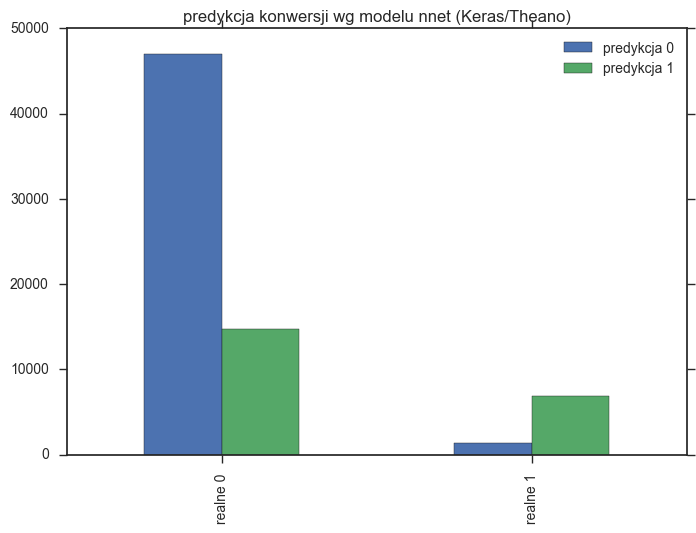

In [44]:
#sprawdźmy jakość naszego modelu na danych testowych

pred_nnet= pipeline_keras_nnet.predict(testing[imp_vars])
pred_nnet_proba = pipeline_keras_nnet.predict_proba(testing[imp_vars])

pred_nnet_proba_1 = list(pd.DataFrame(pred_nnet_proba)[1])


#liczymy macierz błędu dla nnet

cf_nnet=confusion_matrix(testing["Target"],pred_nnet)

cf_nnet_pd = pd.DataFrame(cf_nnet)
cf_nnet_pd.columns=["predykcja 0","predykcja 1"]
cf_nnet_pd.index = ["realne 0","realne 1"]
cf_nnet_pd.plot(kind="bar",title="predykcja konwersji wg modelu nnet (Keras/Theano)")

sens = round(cf_nnet[1][1]*1.00 / np.sum(cf_nnet[1]),2)
spec = round(cf_nnet[0][0]*1.00 / np.sum(cf_nnet[0]),2)
aucc = round(roc_auc_score(y_true=testing["Target"],y_score=pred_nnet_proba_1),2)

print("czułość: "+str(sens))
print("specyficzność: "+str(spec))
print("powierzchnia pod krzywą:"+str(aucc))


In [45]:
fpr_nnet, tpr_nnet, thresholds_nnet = roc_curve(testing["Target"], pred_nnet_proba_1, pos_label=1, drop_intermediate = False)

roc_auc_nnet = auc(fpr_nnet, tpr_nnet)


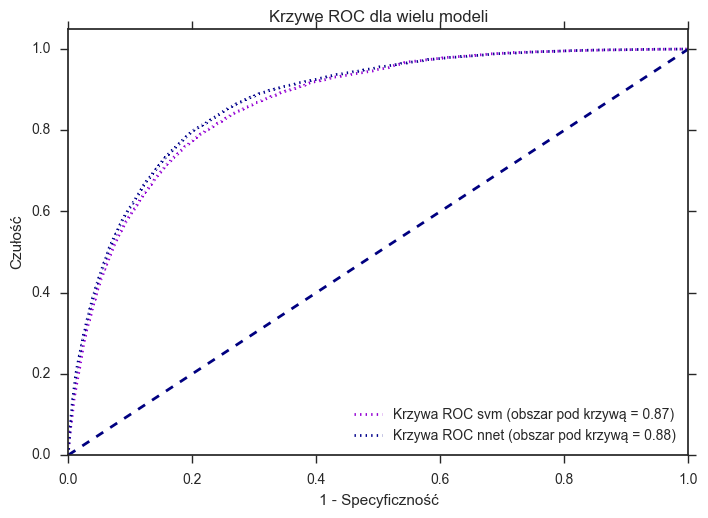

In [46]:
plt.figure()
lw = 2

plt.plot(fpr_svm, tpr_svm, color='darkviolet',
         lw=lw, label=u'Krzywa ROC svm (obszar pod krzywą = %0.2f)' % roc_auc_svm, linestyle=':')
plt.plot(fpr_nnet, tpr_nnet, color='darkblue',
         lw=lw, label=u'Krzywa ROC nnet (obszar pod krzywą = %0.2f)' % roc_auc_nnet, linestyle=':')


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(u'1 - Specyficzność')
plt.ylabel(u'Czułość')
plt.title('Krzywe ROC dla wielu modeli')
plt.legend(loc="lower right")
plt.show()


## Można skorzystać z kilku modeli na raz :) 

### http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [47]:
#krok1 - definiujemy modele

clf1 = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=5, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=-1, verbose=1, refit=True, intercept_scaling=1.0, multi_class='ovr', random_state=seed)

clf2 = ExtraTreesClassifier(n_estimators=300, criterion='gini', max_depth=10, min_samples_split=20, min_samples_leaf=15, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=True, n_jobs=-1, random_state=seed, verbose=1, warm_start=False, class_weight=None)

In [48]:
#krok 2 - korzystamy z VotingClassifier w sklearn

eclf = VotingClassifier(estimators=[('lr', clf1),('xtrees',clf2)],voting='soft')

In [49]:
estimators_eclf = []
estimators_eclf.append(('log1p', transformer_log1p))
estimators_eclf.append(('eclf', eclf))
pipeline_eclf = Pipeline(estimators_eclf)

In [50]:
pipeline_eclf.fit(training_X,training_y)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.8s finished


Pipeline(steps=[('log1p', FunctionTransformer(accept_sparse=False, func=<ufunc 'log1p'>,
          inv_kw_args=None, inverse_func=None, kw_args=None, pass_y=False,
          validate=True)), ('eclf', VotingClassifier(estimators=[('lr', LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
        ...tate=7,
           verbose=1, warm_start=False))],
         n_jobs=1, voting='soft', weights=None))])

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.0s finished


czułość: 0.82
specyficzność: 0.79
powierzchnia pod krzywą:0.88


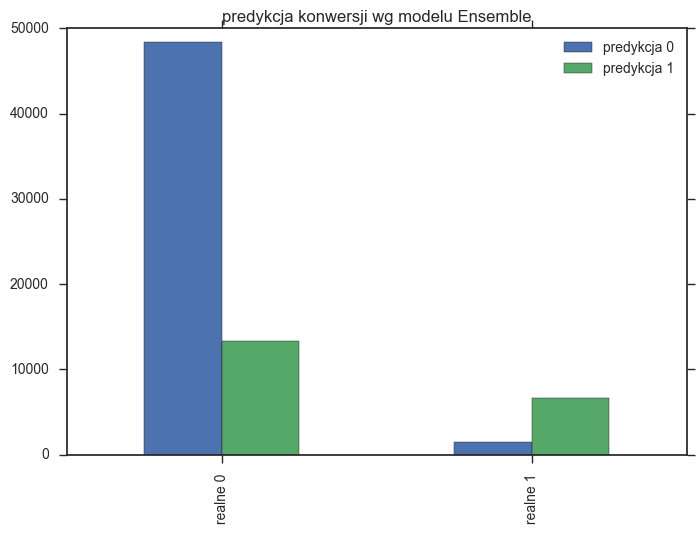

In [51]:
#sprawdźmy jakość naszego modelu na danych testowych

pred_eclf= pipeline_eclf.predict(testing[imp_vars])
pred_eclf_proba = pipeline_eclf.predict_proba(testing[imp_vars])

pred_eclf_proba_1 = list(pd.DataFrame(pred_eclf_proba)[1])

#liczymy macierz błędu dla ensemble

cf_eclf=confusion_matrix(testing["Target"],pred_eclf)

cf_eclf_pd = pd.DataFrame(cf_eclf)
cf_eclf_pd.columns=["predykcja 0","predykcja 1"]
cf_eclf_pd.index = ["realne 0","realne 1"]
cf_eclf_pd.plot(kind="bar",title="predykcja konwersji wg modelu Ensemble")

sens = round(cf_eclf[1][1]*1.00 / np.sum(cf_eclf[1]),2)
spec = round(cf_eclf[0][0]*1.00 / np.sum(cf_eclf[0]),2)
aucc = round(roc_auc_score(y_true=testing["Target"],y_score=pred_eclf_proba_1),2)

print("czułość: "+str(sens))
print("specyficzność: "+str(spec))
print("powierzchnia pod krzywą:"+str(aucc))


In [52]:
fpr_eclf, tpr_eclf, thresholds_eclf = roc_curve(testing["Target"], pred_eclf_proba_1, pos_label=1)
roc_auc_eclf = auc(fpr_eclf, tpr_eclf)


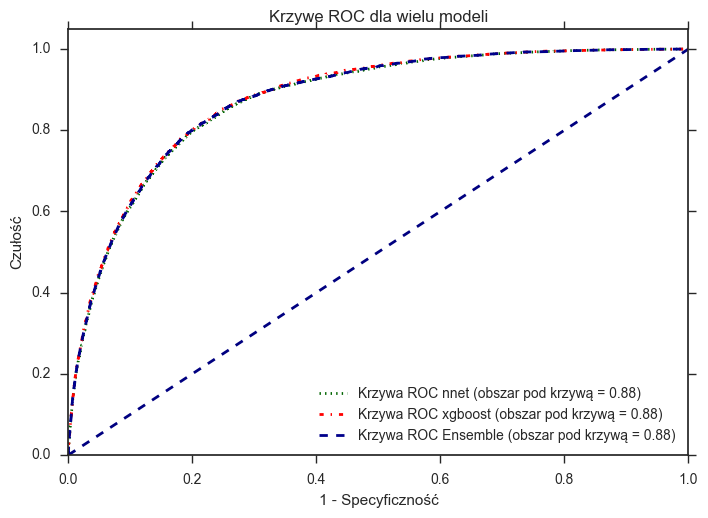

In [53]:
plt.figure()
lw = 2
plt.plot(fpr_nnet, tpr_nnet, color='darkgreen',
         lw=lw, label=u'Krzywa ROC nnet (obszar pod krzywą = %0.2f)' % roc_auc_nnet, linestyle=':')
plt.plot(fpr_xgb, tpr_xgb, color='red',
         lw=lw, label=u'Krzywa ROC xgboost (obszar pod krzywą = %0.2f)' % roc_auc_xgb, linestyle='-.')
plt.plot(fpr_eclf, tpr_eclf, color='darkblue',
         lw=lw, label=u'Krzywa ROC Ensemble (obszar pod krzywą = %0.2f)' % roc_auc_eclf, linestyle='--')


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(u'1 - Specyficzność')
plt.ylabel(u'Czułość')
plt.title('Krzywe ROC dla wielu modeli')
plt.legend(loc="lower right")
plt.show()


## Sprawdźmy na koniec korelacje między wynikami

In [54]:
pred_frame = pd.DataFrame()

pred_frame["ensemble"] = list(pred_eclf_proba_1)
pred_frame["xgboost"] = list(pred_xgb_proba_1)
pred_frame["nnet"] = list(pred_nnet_proba_1)

print("korelacje między modelami predykcyjnymi:")
print(str(pred_frame.corr()))

korelacje między modelami predykcyjnymi:
          ensemble   xgboost      nnet
ensemble  1.000000  0.993394  0.993333
xgboost   0.993394  1.000000  0.991164
nnet      0.993333  0.991164  1.000000


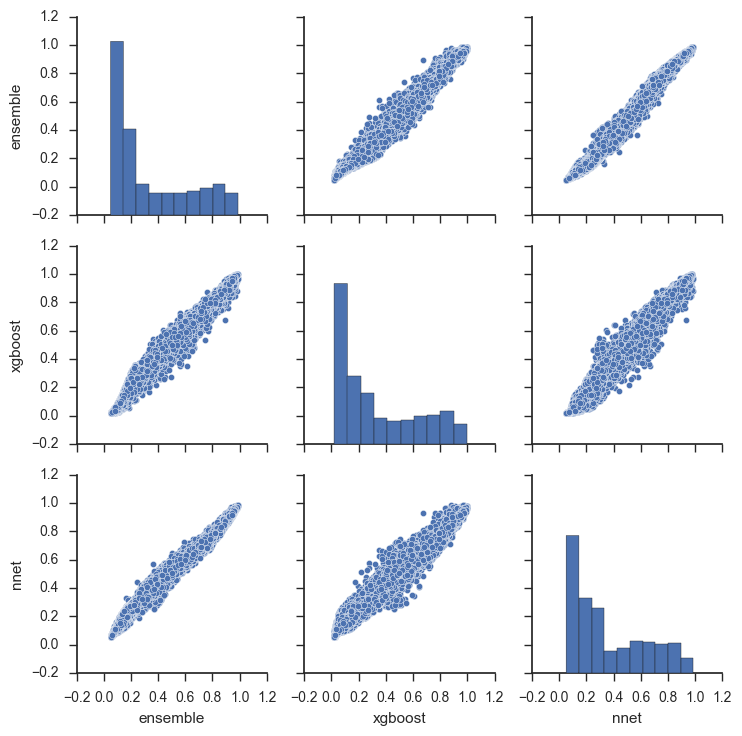

In [55]:
sns.pairplot(pred_frame)

### Sprawdźmy dystrybucję realnych 0 i 1 wobec zaokrąglonego prawdopodobieństwa 1 wg modelu xgboost

##### Uwaga: jeśli chcemy znormalizować rozkład prawdopodobieństw nie tracąc dokładności modelu można pomyśleć o regresji izotonicznej: http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html


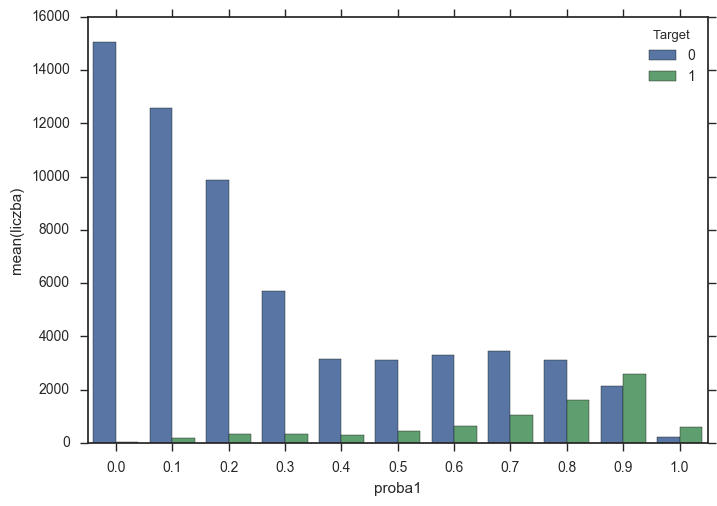

In [56]:
pred_stats = pd.DataFrame()

pred_stats["Target"]=testing["Target"]
pred_stats["proba1"]=[round(x,1) for x in pred_xgb_proba_1]
pred_stats["liczba"]=1

pred_stats_show= pred_stats.groupby(['Target', 'proba1'], as_index=False).count()

sns.barplot(x="proba1", y="liczba", hue="Target", data=pred_stats_show)                                  
                                  

### Przy selekcji finalnego modelu możemy też skorzystać z krzywej Precyzja-Czułość (Precision-Recall Curve)

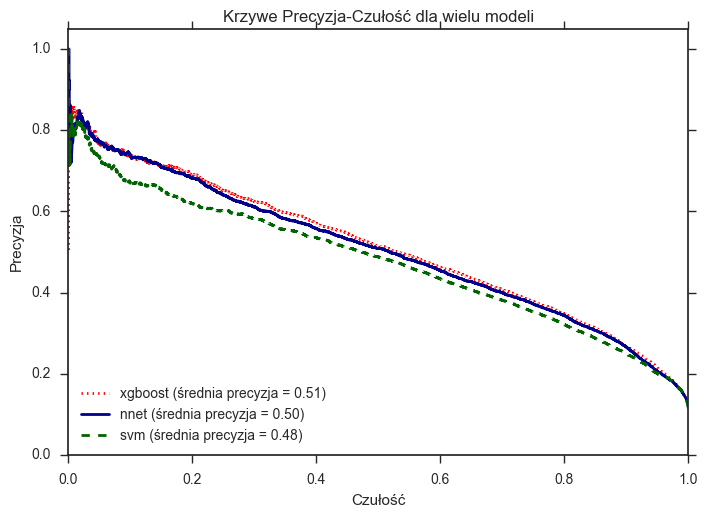

In [57]:
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_true=testing["Target"],probas_pred=pred_xgb_proba_1, pos_label=1)
average_precision_xgb  = average_precision_score(testing["Target"],pred_xgb_proba_1)

precision_nnet, recall_nnet, thresholds_nnet = precision_recall_curve(y_true=testing["Target"],probas_pred= pred_nnet_proba_1, pos_label=1)
average_precision_nnet  = average_precision_score(testing["Target"],pred_nnet_proba_1)

precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_true=testing["Target"],probas_pred= pred_svm_proba_1, pos_label=1)
average_precision_svm  = average_precision_score(testing["Target"],pred_svm_proba_1)

lw=2
plt.clf()
plt.plot(recall_xgb, precision_xgb, lw=lw, color='red',
         label=u'xgboost (średnia precyzja = %0.2f)' % average_precision_xgb, linestyle=':')
plt.plot(recall_nnet, precision_nnet, lw=lw, color='darkblue',
         label=u'nnet (średnia precyzja = %0.2f)' % average_precision_nnet, linestyle='-')
plt.plot(recall_svm, precision_svm, lw=lw, color='darkgreen',
         label=u'svm (średnia precyzja = %0.2f)' % average_precision_svm, linestyle='--')
plt.xlabel(u'Czułość')
plt.ylabel(u'Precyzja')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.title(u"Krzywe Precyzja-Czułość dla wielu modeli")
plt.show()


##  Wdrożenie najlepszych modeli


In [58]:
#przygotujmy dane

dataset_apply[miss_vars] = dataset_apply[miss_vars].fillna(dataset_apply[miss_vars].median())

apply_data = dataset_apply[imp_vars].as_matrix()

print("dane wdrożeniowe: "+str(apply_data.shape))


dane wdrożeniowe: (104862L, 28L)


In [59]:
#wdrożenie modelu z keras i ensemle - przetworzenie danych przy użyciu log1p następuje dzięki pipeline

pred_nnet_prob = pipeline_keras_nnet.predict_proba(apply_data)

pred_ensemble_prob = pipeline_eclf.predict_proba(apply_data)

#w przypapadku xgboost musimy dodatkowo użyć funkcji log1p
apply_data_xgboost = dataset_apply[imp_vars].apply(np.log1p, axis=0).as_matrix()

pred_xgboost_prob = model_xgbm.predict_proba(apply_data_xgboost)




104500/104862 [============================>.] - ETA: 0s

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.7s finished


In [60]:
#zbieramy dane do jednego DataFrame i zwizualizujemy

predictions = pd.DataFrame()

predictions["userid"]=dataset_apply["userid"]

predictions["nnet"]=pd.DataFrame(pred_nnet_prob)[1]
predictions["ensemble"]=pd.DataFrame(pred_ensemble_prob)[1]
predictions["xgboost"]=pd.DataFrame(pred_xgboost_prob)[1]

#sprawdźmy dane
predictions.iloc[1:20,:]

,userid,nnet,ensemble,xgboost
1,106193,0.141836,0.130022,0.099348
2,1713,0.798932,0.845684,0.832308
3,65133,0.857494,0.890987,0.871001
4,202539,0.902937,0.924968,0.926918
5,222844,0.099204,0.091872,0.041073
6,286005,0.830880,0.868363,0.837384
7,120707,0.281356,0.207650,0.248491
8,93745,0.835682,0.863925,0.820075
9,48568,0.568934,0.505608,0.512344
10,165205,0.278461,0.234920,0.223990


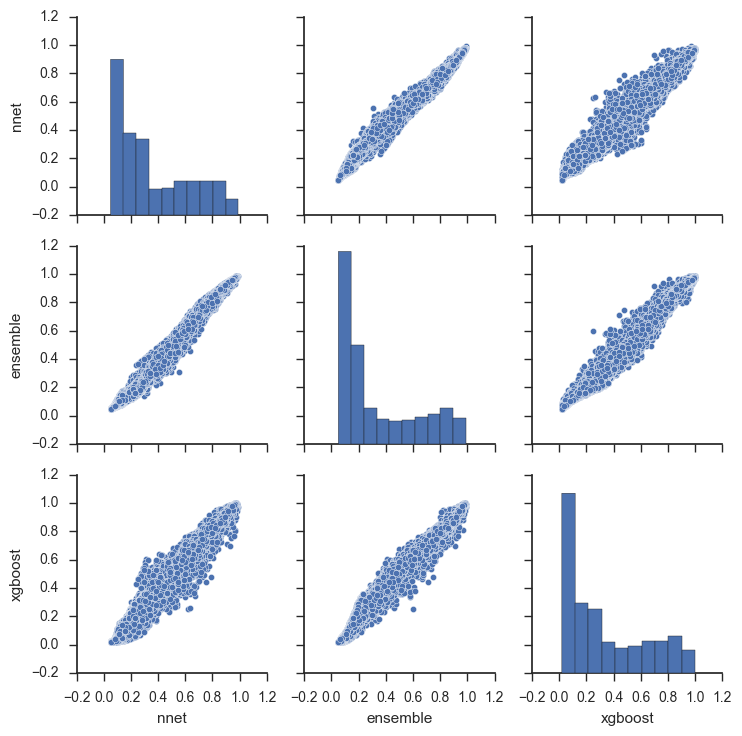

In [61]:
sns.pairplot(predictions.iloc[:,1:4])

In [62]:
print("korelacje między predykcjami:")
print(str(predictions.iloc[:,1:4].corr()))



korelacje między predykcjami:
              nnet  ensemble   xgboost
nnet      1.000000  0.993494  0.991220
ensemble  0.993494  1.000000  0.992924
xgboost   0.991220  0.992924  1.000000


#zapis do pliku csv

predictions.to_csv("results/predictions.csv", index=False, header=True,sep=";")


## Dziękuję za udział w warsztatach, chętnie wysłucham Państwa uwag i pytań :)

### Literatura warta uwagi:

<img src="img/book1.jpg", width=400,height=400>
<img src="img/book2.jpg", width=400,height=400>
<img src="img/book3.png", width=400,height=400>
<img src="img/book4.jpg", width=400,height=400>
<img src="img/book5.jpg", width=400,height=400>